<div style="background-color:#80ced6; color:white">
<h2><b>DataCamp</b></h2>
<h3>Statistical Thinking I</h3>
</div>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introdução
### Random Numbers

A aleatoriedade tem muitos usos na ciência, arte, estatística, criptografia, jogos, jogos de azar e outros campos. Você vai usar aleatoriedade para simular um jogo.

Toda a funcionalidade que você precisa está contida no pacote random, um sub-pacote de numpy. Neste exercício, você estará usando duas funções deste pacote:

<li>seed (): define a semente aleatória, para que seus resultados sejam reprodutíveis entre as simulações. Como argumento, é preciso um inteiro de sua escolha. Se você chamar a função, nenhuma saída será gerada.</li>
<li>rand (): se você não especificar nenhum argumento, ele gerará uma flutuação aleatória entre zero e um.</li>

In [2]:
# Set the seed
np.random.seed(123)

# Generate and print random float
print(np.random.rand())

0.6964691855978616


Também pode-se usar randint(), uma função do pacote random, para gerar números inteiros aleatoriamente. A chamada a seguir gera o inteiro 4, 5, 6 ou 7 aleatoriamente. 8 não está incluído.

In [3]:
np.random.randint(4, 8)

6

E se você usar um dado 100 vezes para determinar seu próximo passo? Você teria uma sucessão de etapas aleatórias, ou em outras palavras, uma caminhada aleatória.

Este é um conceito bem conhecido na ciência. Por exemplo, o caminho traçado por uma molécula enquanto viaja em um líquido ou gás pode ser modelado como um passeio aleatório.

Para gravar todos os passos da sua caminhada aleatória, você precisa aprender a construir gradualmente uma lista com um loop for.

In [4]:
outcomes = []
for x in range(10):
    coin = np.random.randint(0, 2)
    if coin == 0:
        outcomes.append('heads')
    else:
        outcomes.append('tails')
print(outcomes)

['heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails', 'tails', 'heads']


Dê uma olhada no código acim. Ele mantém os resultados para jogar um jogo de cara ou coroa 10 vezes. Esta lista é aleatória, mas não é Random Walk, porque os itens da lista não são baseados nos anteriores.

Você pode transformar este exemplo em um Random Walk rastreando o número total de caras enquanto estiver simulando o jogo.

In [5]:
tails = [0]
for x in range(10):
    coin = np.random.randint(0, 2)
    tails.append(tails[x] + coin)
print(tails)

[0, 1, 1, 2, 2, 3, 4, 4, 4, 4, 5]


Se você comparar a saída do primeiro código com a saída do segundo script, poderá ver que os números na lista de caras são incrementados em um a cada vez que se obtem caras. Isto é exatamente como um monte de passos aleatórios são convertidos em um Random Walk.

Quão baixo você pode ir?

Há algo que não pensamos - você não pode ir abaixo de 0!

Uma maneira típica de resolver problemas como esse é usando max(). Se você passar max() dois argumentos, o maior será retornado. Por exemplo, para garantir que uma variável x nunca fique abaixo de 10 ao diminuí-la, você pode usar: x = max(10, x - 1)

In [6]:
# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64, 63, 62, 64, 63, 64, 66, 67, 68, 73, 72, 73, 74, 75]


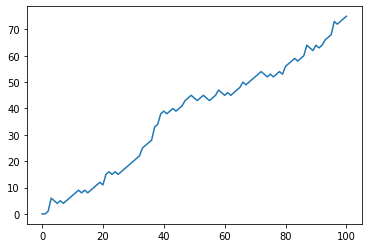

In [7]:
plt.plot(random_walk)

# Show the plot
plt.show()

Vamos voltar ao problema inicial. 

Por 100 vezes, você joga um dado. Dependendo do resultado, você dá alguns passos para cima ou para baixo. Isso é chamado de Random Walk.

Mas você ainda precisa responder à pergunta principal: qual é a chance de atingir 60 passos de altura?

Cada random walk terminará em uma etapa diferente. Se você simular essa caminhada milhares de vezes, terá milhares de etapas finais. Esta é uma distribuição de etapas finais. E uma vez que se conhece a distribuição, pode-se calcular sua chance.

In [8]:
final_tails = []
for x in range(100):
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0, 2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
print(final_tails)

[4, 2, 4, 5, 7, 7, 4, 6, 7, 5, 4, 6, 7, 6, 8, 4, 5, 7, 2, 5, 5, 5, 6, 7, 10, 5, 2, 4, 6, 4, 5, 3, 4, 7, 5, 7, 5, 5, 3, 6, 6, 7, 6, 7, 4, 3, 7, 3, 7, 4, 6, 4, 6, 5, 5, 7, 3, 5, 3, 3, 3, 5, 3, 7, 5, 6, 8, 6, 5, 4, 7, 6, 6, 5, 3, 6, 6, 4, 7, 4, 4, 8, 7, 8, 5, 6, 7, 6, 6, 6, 6, 3, 6, 6, 4, 8, 4, 5, 6, 6]


A distribuição deste Random Walk é mostrada acima. Primeiro é criada a lista final_tails vazia, que conterá o número de caras obtidas a cada 10 vezes que as moedas forem lançadas. Então é criado um loop externo para um range de 100. Este loop contem o código anterior, que construiu a lista de caras gradualmente.

Após a simulação de 10 lançamentos, o resultado é armazenado em final_taisl (o valor -1 é para obter a última posição da lista).

O comando print mostra a quantidade de caras obtidas a cada 10 lançamentos.

Todos esses valores representam uma distribuição, que pode ser visualizada através de um histrograma.

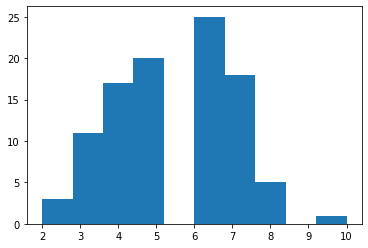

In [9]:
plt.hist(final_tails, bins = 10)
plt.show()

Vamos refazer o código acima, aumentando o range do loop externo de 100 para 1000.

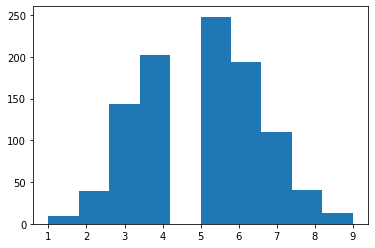

In [10]:
final_tails = []
for x in range(1000):
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0, 2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
plt.hist(final_tails, bins = 10)
plt.show()

Se aumentarmos a simulação para 10000 vezes, a distribuição converge para a forma de sino. De fato, começa a parecer como uma distribuição teórica.

Nesta curva podemos ver que em torno de 2500 jogdas dos 10000 lançamentos, foi obtido o valor cara 5 vezes. Isso faz sentido pois a chance é de 50%.

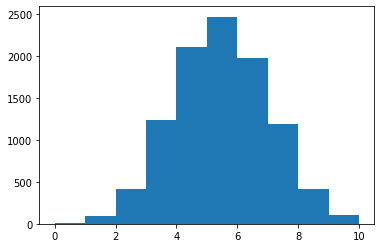

In [11]:
final_tails = []
for x in range(10000):
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0, 2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
plt.hist(final_tails, bins = 10)
plt.show()

Simule vários Random Walk

Uma única caminhada aleatória é uma coisa, mas isso não informa se você tem uma boa chance de ganhar a aposta.

Para ter uma idéia de quão grandes são suas chances de atingir 60 etapas, você pode simular repetidamente a caminhada aleatória e coletar os resultados.

In [12]:
# Initialize all_walks (don't change this line)
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

Visualize todos os passeios

all_walks é uma lista de listas: cada sub-lista representa uma única caminhada aleatória. Se você converter essa lista de listas em um array Numpy, poderá começar a fazer gráficos interessantes!

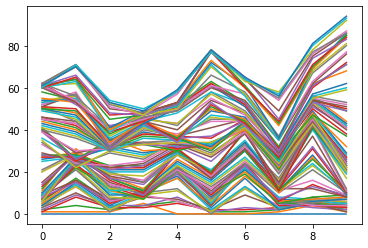

In [13]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

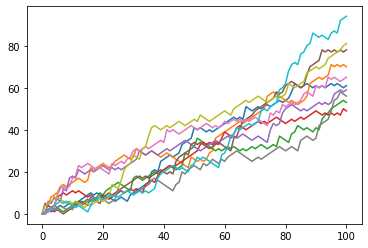

In [14]:
# Transpose np_aw: np_aw_t
# Agora todas as linhas em np_all_walks representam a posição após 1 lance 
# para os 10 passeios aleatórios.
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

Você pode ver claramente como foram as diferentes simulações da Random Walk. Transpor a matriz 2D Numpy foi crucial, caso contrário, Python não entenderia.

Implementar falta de jeito

Ainda há algo que esquecemos! Você é um pouco desajeitado e tem 0,1% de chance de cair. Isso exige outra geração de números aleatórios. Basicamente, você pode gerar uma flutuação aleatória entre 0 e 1. Se esse valor for menor ou igual a 0,001, você deve redefinir a etapa para 0.

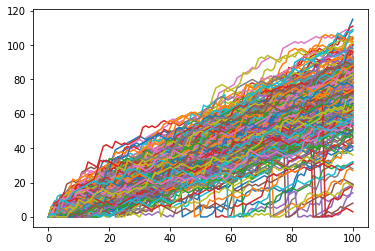

In [15]:

# numpy and matplotlib imported, seed set

# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() < 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

Traçar a distribuição

Ainda temos que resolver o problema de um milhão de dólares: quais são as chances de você atingir 60 degraus no Empire State Building?

Basicamente, você deseja saber sobre os pontos finais de todos os Random Walks que você simulou. Esses pontos finais têm uma certa distribuição que você pode visualizar com um histograma.

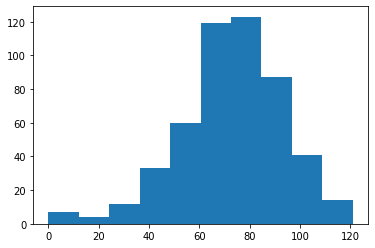

In [16]:
# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

Calcular as probabilidades

O histograma acim foi criado a partir de uma matriz Numpy ends, que contém 500 números inteiros. Cada número inteiro representa o ponto final de uma Random Walk. Para calcular a chance de que esse ponto final seja maior ou igual a 60, você pode contar números maiores ou iguais a 60 e dividir esse número por 500, o número total de simulações.

Bem, então, qual é a chance estimada de atingir 60 degraus de altura se você jogar este jogo do Empire State Building?

In [17]:
goal = 0
for x in ends:
    if x >= 60:
        goal += 1
goal/500

0.774

### Introdução ao Statiscal Thinking I

In [18]:
df_swing = pd.read_csv('2008_swing_states.csv')

In [19]:
df_swing[['state', 'county', 'dem_share']].head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


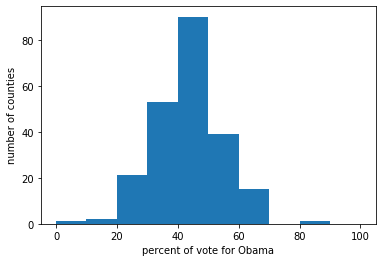

In [20]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins = bin_edges)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

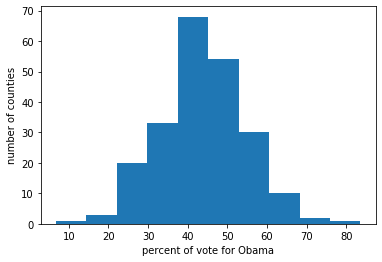

In [21]:
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

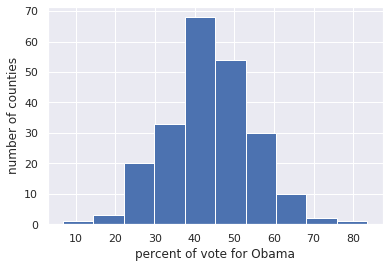

In [22]:
sns.set()

_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

O mesmo dataset pode promover diferentes histogramas dependendo da forma em que os bins são escolhidos.

Outro problema dos histogramas é que eles não mostram todos os dados, pois, os dados estão dentro de caixas, onde perdem seus valores. Para contornar isto, utiliza-se o swarm plot. 


No exemplo abaixo, cada ponto representa uma parte dos votos de Obama em um estado. A posição ao longo do eixo Y é uma informação quantitativa. Os dados estão espalhados em X para torná-los visíveis, mas, sua precisão ao longo do eixo X é irrelevante.

Para gerar o swarm plot os dados devem estar organizados de tal forma que cada coluna é uma característica e cada linha é uma observação. Aqui a observação é o estado (county) e as características são os estados e o percentual de votos democratas (dem_share)

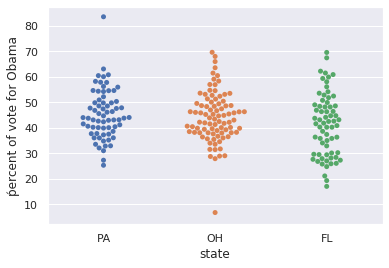

In [23]:
_ = sns.swarmplot(x = 'state', y = 'dem_share', data = df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('ṕercent of vote for Obama')
plt.show()

### ECDF: Empirical cumulative distribution functions

O valor de Y é a fração dos pontos dos dados que tem um valor menor do que seu correspondente valor de X.

Para criar o gráfico ECDF o eixo X deve estar ordenado, via função sort de NumPy.

O eixo y é uma sequência uniformemente espaçada com valor máximo 1, que podemos gerar usando função arange de NumPy, dividida pelo número total de pontos.

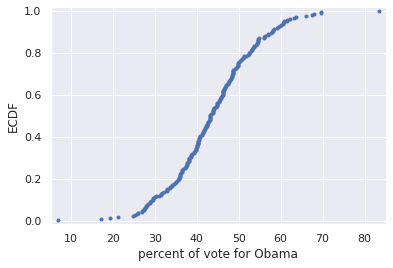

In [24]:
# definição dos dados
x = np.sort(df_swing.dem_share)
y = np.arange(1, len(x) + 1) / len(x)

# criação do gráfico ECDF
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
# A função plt.margins garante que os pontos não irão extrapolar a área de plotagem
plt.margins(0.02)
plt.show()

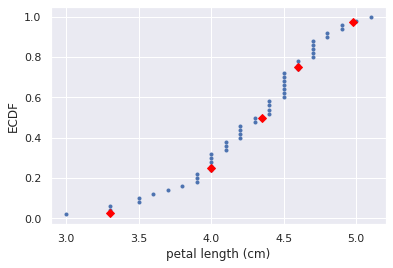

In [25]:
iris = sns.load_dataset("iris")
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

x_vers = np.sort(versicolor_petal_length)
y_vers = np.arange(1, len(x_vers) + 1) / len(x_vers)

_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

In [26]:
# Calculando percentis:
np.percentile(df_swing.dem_share, [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

### Interpretação do Boxplot

Na caixa:
- a linha inferior representa 25% percentil
- a linha superior representa 75% percentil
- a linha no centro representa a mediana
- a altura da caixa representa os 50% dos dados centrais, também chamada de intervalo interquartil (IQR)

Os bigodes estendem a distância de 1,5 vezes o IQR, ou até a extensão dos dados, o que for mais extremo. Os pontos que ultrapassam os bigodes são outliers.

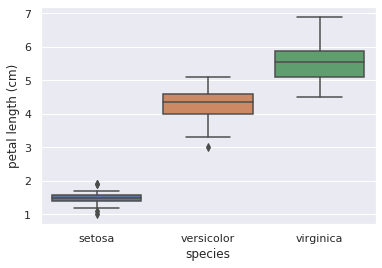

In [27]:
# Create box plot with Seaborn's default settings
sns.set()
_ = sns.boxplot(x='species', y='petal_length', data=iris)
# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


In [28]:
# Variância é a média da raiz quadrada da distância média do dado até sua média
dem_share_FL = df_swing[df_swing['state'] == 'FL']['dem_share']
print(np.var(dem_share_FL))
print(np.std(dem_share_FL)) # std é raiz quadrada da variância

147.44278618846064
12.142602117687158


In [29]:
# Covariance and Pearson correlation coefficient

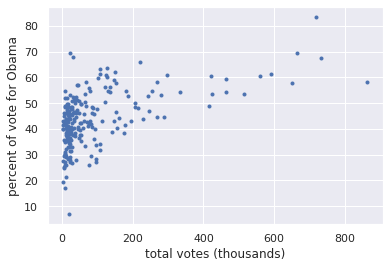

In [30]:
_ = plt.plot(df_swing['total_votes']/1000, df_swing['dem_share'], marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

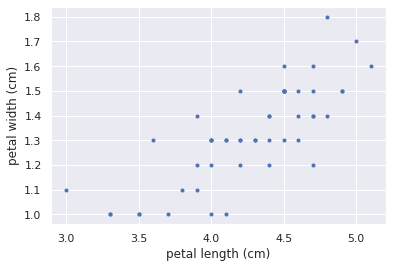

In [31]:
# número que calcula quanto um número varia em relação a outro: covariância
versicolor_petal_length = iris[iris.species == 'versicolor']['petal_length']
versicolor_petal_width  = iris[iris.species == 'versicolor']['petal_width']

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

In [32]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[1,0]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### O coeficiente de correlação de Pearson

Também chamado de Pearson r, é frequentemente mais fácil de interpretar do que a covariância. 

É calculado usando a função np.corrcoef (). Como o np.cov (), ele usa dois arrays como argumentos e retorna um array 2D.

Entradas [0,0] e [1,1] são necessariamente iguais a 1.

In [33]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Distribuições de probabilidades contínuas e discretas

A distribuição contínua descreve as probabilidades dos possíveis valores de uma variável aleatória contínua. Uma variável aleatória contínua é uma variável aleatória com um conjunto de valores possíveis (conhecidos como a intervalos) que é infinito e incontável.

As probabilidades de variáveis aleatórias contínuas (X) são definidas como a área sob a curva da sua distribuição. Assim, apenas as faixas de valores podem ter uma probabilidade diferente de zero. A probabilidade de que uma variável aleatória contínua seja igual a algum valor é sempre zero porque a área sob a curva em um único ponto, que não tem nenhuma largura, é zero.. Toda a área sob a curva equivale a 1,0.

Uma distribuição discreta descreve a probabilidade de ocorrência de cada valor de uma variável aleatória discreta. Uma variável aleatória discreta é uma variável aleatória que tem valores contáveis.

Com uma distribuição de probabilidade discreta, cada valor possível da variável aleatória discreta pode ser associado a uma probabilidade diferente de zero. Deste modo, uma distribuição de probabilidade discreta é, por vezes, apresentado em forma de tabela.

Distribuição discreta: Poisson e Binomial

Distribuição contínua: Normal e Exponencial

### Coração da estatística inferencial: 

É o processo pelo qual passamos de dados medidos para conclusões probabilísticas sobre o que poderíamos esperar se coletássemos os mesmos dados novamente. Seus dados falam na linguagem da probabilidade.

O modulo random de Numpy, um conjunto de funções baseado na geração de números pseudo-aleatórios, será seu principal mecanismo para fazer isso. A mesma seed dá a mesma sequência de números aleatórios, daí o nome, geração de números pseudo-aleatórios.

In [34]:
np.random.seed(42)

random_numbers = np.random.random(4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [35]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [36]:
np.sum(heads) # a soma é 1 porque Python entende 1 como True e 0 como False

1

In [37]:
# simulação do lançamento de 4 moedas:
n_all_heads = 0 # inicializa das 4 moedas

for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads / 10000

0.0619

Digamos que um banco tenha feito 100 empréstimos hipotecários.

É possível que entre 0 e 100 dos empréstimos sejam inadimplentes.

Você gostaria de saber a probabilidade de obter um determinado número de padrões, dado que a probabilidade de um padrão é p = 0,05.

Para investigar isso, você fará uma simulação. Você executará 100 testes de Bernoulli usando a função perform_bernoulli_trials () e registrará quantos padrões obteremos.

Aqui, um sucesso é um padrão. Lembre-se que a palavra "sucesso" significa apenas que o teste de Bernoulli é avaliado como Verdadeiro, ou seja, o padrão do recebedor do empréstimo. Você fará isso por outros 100 testes de Bernoulli. E de novo e de novo até que tenhamos tentado 1000 vezes.

Em seguida, você plotará um histograma descrevendo a probabilidade do número de padrões.

In [38]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

/home/angelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


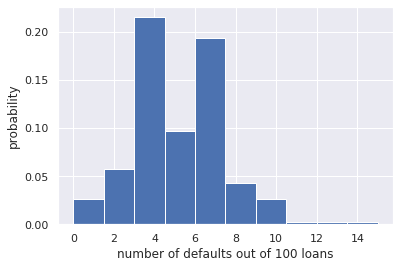

In [39]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
# normed=True: keyword argument so that the height of the bars of the histogram 
# indicate the probability
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()



O banco falhará?

Plote o número de padrões obtidos no exercício anterior como n_defaults, como um CDF. A função ecdf() está disponível.

Se as taxas de juros forem tais que o banco perderá dinheiro se 10 ou mais de seus empréstimos forem inadimplentes, qual é a probabilidade de o banco perder dinheiro?

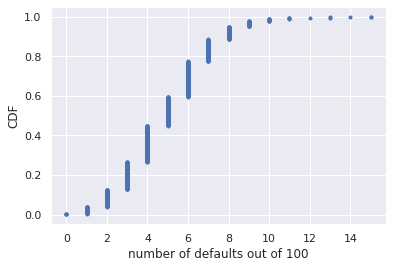

Probability of losing money = 0.022


In [40]:
# Compute ECDF: x, y
x = np.sort(n_defaults)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# Como poderíamos esperar, é mais provável que recebamos 5/100 padrões.
# Mas ainda temos cerca de 2% de chance de obter 10 ou mais inadimplências em 100 empréstimos.

### Função Massa de Probabilidade (FMP)

É o conjunto de probabilidade de resultados discretos. Como exemplo se tem jogar moeda onde se obtem cara ou coroa ou jogar um dado onde se obtem valores de 1 a 6. Em ambos os casos o resutado é uma probabilidade uniforme, 1/2 para o primeiro e 1/6 para o segundo. Por isso, a FMP relacionada a eles é chamada de Função Massa de Probabilidade Discreta.

A FMP é uma propriedade de uma distribuição de probabilidade discreta. Uma distribuição é uma representação matemática dos resultados.

No exemplo do jogo das moedas, temos uma distribuição binomial. Isso pode ser escrito com um função Numpy: np.random.binomial(4, 0.5, size = 10), ou seja, são 4 moedas, com 50% de chances de obter cara, sendo jogadas para cima 10 vezes.

Calcule a função de massa de probabilidade para o número de defaults que esperaríamos para 100 empréstimos como na última seção, mas em vez de simular todos os testes de Bernoulli, faça a amostragem usando np.random.binomial ().

Depois de coletar as amostras, plote o CDF mais uma vez. Este CDF é o da distribuição Binomial.

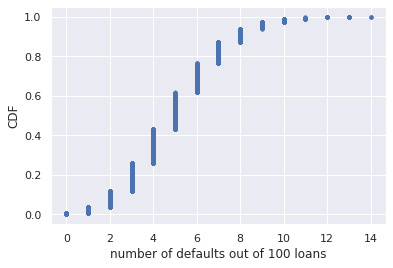

In [41]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x = np.sort(n_defaults)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

Nós plotaremos o PMF da distribuição Binomial como um histograma. O truque é configurar as bordas dos bins para passar para plt.hist() por meio do argumento bins.

Queremos os bins centrados nos inteiros. Assim, as bordas dos bins devem ser -0,5, 0,5, 1,5, 2,5, ... até o máximo (n_defaults) + 1,5. Uma matriz como essa pode ser gerada usando np.arange() e subtraindo 0,5 da matriz.

As amostras da distribuição Binomial nos padrões de empréstimos e as amostras resultantes estão no array NumPy n_defaults.

/home/angelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


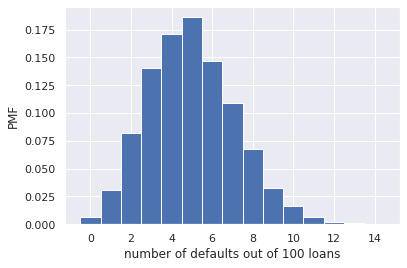

In [42]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed = True, bins = bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

### Exemplos de eventos Poisson
Trata-se de eventos independentes, como os nascimentos em um hospital.

### Distribuição de Poisson
Número de eventos em um intervalo de tempo com taxa média por intervalo.
Exemplo: quantidade de acessos a um site em uma hora com taxa média de acesso de 6/hora
é uma distribuição de Poisson.

Limite da distribuição binomial para baixa probabilidade de sucesso e grande número de tentativas.

Isto é, para eventos raros.

### Relação entre distribuições Binomial e Poisson (distribuições discretas)

A distribuição de Poisson é um limite da distribuição Binomial para eventos raros. Isso faz sentido se você pensar nas histórias. Digamos que façamos um teste de Bernoulli a cada minuto por uma hora, cada um com uma probabilidade de sucesso de 0,1. Fizemos 60 tentativas, e o número de sucessos é distribuído Binomialmente, e esperamos obter cerca de 6 sucessos. Isto é como a história de Poisson, onde obtemos em média 6 sucessos em uma hora.

Assim, a distribuição de Poisson com taxa de chegada igual a np se aproxima de uma distribuição Binomial para n tentativas de Bernoulli com probabilidade p de sucesso (com n grande e p pequeno). É importante ressaltar que a distribuição de Poisson é geralmente mais simples de se trabalhar porque possui apenas um parâmetro em vez de dois para a distribuição Binomial.

A seguir, você calculará a média e o desvio padrão das amostras de uma distribuição de Poisson com uma taxa de chegada de 10. Então, você calculará a média e o desvio padrão das amostras de uma distribuição Binomial com os parâmetros n e p tais que np = 10 .

In [43]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size = 10000)

# Print the mean and standard deviation
print('Poisson mean: ', np.mean(samples_poisson),
      '; Poisson std: ', np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]    # so that np is always 10.

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], '; Binom mean: ', np.mean(samples_binomial),
                       '; Binom std: ', np.std(samples_binomial))
    
# As médias são iguais, como mostrado.
# O desvio padrão da distribuição Binomial aproxima-se cada vez mais do da
# distribuição de Poisson à medida que a probabilidade p fica menor.

Poisson mean:  10.0145 ; Poisson std:  3.1713545607516043
n = 20 ; Binom mean:  10.0592 ; Binom std:  2.23523944131272
n = 100 ; Binom mean:  10.0441 ; Binom std:  2.9942536949964675
n = 1000 ; Binom mean:  10.0129 ; Binom std:  3.139639085946026


In [44]:
# Média 251/115
# probabilidade de 7 ou mais

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

# O resultado é cerca de 0,007. Isso significa que não é tão improvável.

Probability of seven or more no-hitters: 0.0072


### Probability Density Functions

Até agora, falamos sobre probabilidades de quantidades discretas, como jogar dados, mas e quanto a quantidades contínuas?

Uma quantidade contínua pode assumir qualquer valor, não apenas valores discretos. Variáveis ​​contínuas também têm distribuições de probabilidades.

Considere o experimento de velocidade da luz de Michelson, que distribuições de probabilidade descrevem esses dados? Eu acredito que os dados seguem a distribuição Normal.

Para entender o que é a distribuição Normal, vamos considerar sua função de densidade de probabilidades ou PDF.

Este é o análogo contínuo da função massa de probabilidade, o PMF. Descreve a chance de observar um valor de variável contínua. a probabilidade de observar um único valor da velocidade da luz não faz sentido porque há uma infinidade de números, digamos entre 299,6 e 300,0 megametros por segundo. Em vez disso, as áreas sob o PDF fornecem probabilidades.

Portanto, a probabilidade de medir que a velocidade da luz é superior a 300.000 km/s é uma área abaixo da curva normal.

Parametrizando o PDF com base no experimento de Micheson, essa é uma chance de cerca de 3%, pois a região hachurada (final da calda direita) representa cerca de 3% da área total do PDF.

Para fazer esse cálculo, observamos a função de distribuição cumulativa, ou CDF, da distribuição Normal, em forma de S, com velocidade no eixo X e as probabilidades no eixo Y.

Lembre-se de que o CDF fornece a probabilidade de que a velocidade da luz medida seja menor que o valor no eixo x.

### Introdução à Distribuição Normal

A distribuição Normal descreve uma variável contínua cujo PDF é simétrico e possui um único pico.

A distribuição Normal é parametrizada por dois parâmetros: (1) a média determina onde está o centro do pico; (2) o desvio padrão é uma medida de quão amplo é o pico ou de como os dados estão espalhados.

Observe que a média e o desvio padrão são os nomes dos parâmetros da distribuição Normal. Não os confunda com a média e o desvio e padrão que calculamos diretamente dos dados ao fazer uma análise exploratória dos dados.

Se adicionarmos um histograma das medições de Michelson, veremos que as medidas da velocidade da luz no ar parecem estar normalmente distribuídas.

A comparação do histograma com o PDF sofre com o viés de binning, portanto, é melhor comparar o ECDF dos dados com o CDF teórico da distribuição Normal.

Para calcular o CDF teórico, podemos usar np.random.normal para coletar amostras e depois podemos calcular o CDF.

Como foi o caso da amostragem da distribuição binomial, precisamos fornecer parâmetros, neste caso a média e o desvio padrão, para parametrizar a distribuição Normal da qual estamos amostrando.

A média e o desvio padrão calculados a partir dos dados são boas estimativas, portanto, nós os calcularemos e os passaremos para np.randon.normal para coletar nossas amostras.

Em seguida, usamos a função que já escrevemos para calcular os ECDFs dos dados e das amostras teóricas normalmente distribuídas que acabamos de desenhar.

Finalmente, traçamos os CDFs teóricos e empíricos no mesmo gráfico.

Com a ausência de viés de binning, fica mais claro que os dados de Michelson são aproximadamente distribuídos normalmente.

### O PDF normal
Neste exercício, você explorará o PDF normal e também aprenderá uma maneira de plotar um PDF de uma distribuição conhecida usando estatísticas de hackers. Especificamente, você plotará um PDF normal para vários valores da variação.

In [45]:
# Desenha 100.000 amostras de uma distribuição Normal que tem uma média de 20 e um desvio 
# padrão de 1. Faça o mesmo para distribuições Normais com desvios padrão de 3 e 10, 
# cada uma ainda com uma média de 20. Atribua os resultados a samples_std1, samples_std3 
# e samples_std10, respectivamente.
samples_std1  = np.random.normal(20, 1,  size = 100000)
samples_std3  = np.random.normal(20, 3,  size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

/home/angelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/angelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/angelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


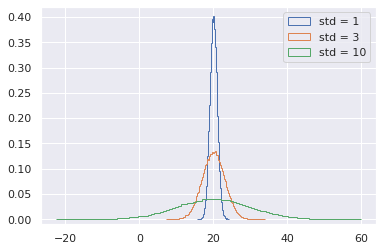

In [46]:
# Traçar um histograma de cada uma das amostras; para cada um, use 100 bins, 
# também usando os argumentos normed = True e histtype = 'step'. 
# O último argumento de palavra-chave faz com que o gráfico se pareça com o PDF teórico suave. 
# Você precisará fazer 3 chamadas plt.hist ().

# Make histograms
_ = plt.hist(samples_std1,  normed = True, bins = 100, histtype = 'step')
_ = plt.hist(samples_std3,  normed = True, bins = 100, histtype = 'step')
_ = plt.hist(samples_std10, normed = True, bins = 100, histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

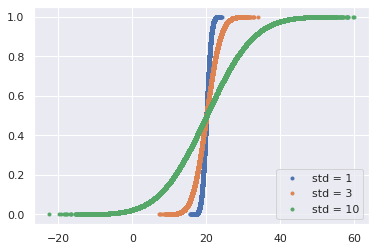

In [47]:
# Agora que você tem uma idéia da aparência do PDF normal, vamos considerar seu CDF. Usando as amostras que você gerou no último exercício, gere e plote
# os CDFs.

# Generate CDFs
x_std1  = np.sort(samples_std1)
y_std1  = np.arange(1, len(x_std1) + 1) / len(x_std1)
x_std3  = np.sort(samples_std3)
y_std3  = np.arange(1, len(x_std3) + 1) / len(x_std3)
x_std10 = np.sort(samples_std10)
y_std10 = np.arange(1, len(x_std10) + 1) / len(x_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1,   marker = '.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3,   marker = '.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

# Conclusão: Todos os CDFs passam pela média no 50º percentil; 
# a média e a mediana de uma distribuição normal são iguais. 
# A largura do CDF varia com o desvio padrão.

Os resultados da Belmont Stakes são normalmente distribuídos?

Desde 1926, o Belmont Stakes é uma corrida de 2,4 quilômetros com cavalos de raça pura de 3 anos. O Secretariado administrou a Estaca Belmont mais rápida da história em 1973. Embora esse tenha sido o ano mais rápido, 1970 foi o mais lento por causa de condições incomumente molhadas e desleixadas. Com esses dois outliers removidos do conjunto de dados, calcule a média e o desvio padrão dos tempos dos vencedores de Belmont. Faça uma amostra de uma distribuição Normal com essa média e desvio padrão usando a função np.random.normal () e plote um CDF. Sobreponha o ECDF dos tempos vencedores de Belmont. Eles estão perto de Normalmente distribuído?

In [48]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7, 150.42, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146. , 146.4 , 148.2 , 149.8 , 147., 147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 , 149., 148.2, 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 , 149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2, 146.6, 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149., 148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 , 149.2, 151., 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 , 149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

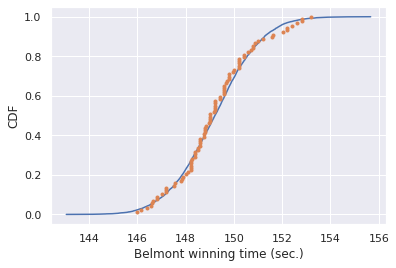

In [49]:
# Compute mean and standard deviation: mu, sigma
mu    = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma,  size = 10000)

# Get the CDF of the samples and of the data
x = np.sort(belmont_no_outliers)
y = np.arange(1, len(x) + 1) / len(x)

x_theor = np.sort(samples)
y_theor = np.arange(1, len(x_theor) + 1) / len(x_theor)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# Conclusão: O CDF teórico e o ECDF dos dados sugerem que os tempos 
# vencedores de Belmont são, de fato, normalmente distribuídos.

Quais são as chances de um cavalo acertar ou bater o recorde de Secretariat?
Suponha que os tempos dos vencedores de Belmont sejam normalmente distribuídos (com os anos de 1970 e 1973 removidos), qual é a probabilidade de o vencedor de uma determinada Estaca Belmont executá-lo mais rápido ou mais rápido que o Secretariado?

In [50]:
belmont = pd.read_csv('belmont.csv')
belmont[belmont['Winner'] == 'Secretariat']

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
43,1973,Secretariat,Ron Turcotte,Lucien Laurin,Meadow Stable,2:24.00,Belmont,1.5


In [51]:
# Take a million samples out of the Normal distribution:
samples = np.random.normal(mu, sigma,  size = 1000000)

# Compute the fraction that are faster than 144 seconds:
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob * 100, '%')

# Conclusão: Tivemos que colher um milhão de amostras, porque 
# a probabilidade de um tempo rápido é muito baixa e tivemos que ter 
# certeza de fazer a amostragem suficiente. Concluímos que há apenas 
# 0,06% de chance de um cavalo correr no Belmont tão rápido quanto o Secretariat.

Probability of besting Secretariat: 0.0599 %


### A distribuição exponencial

Assim como existem várias distribuições discretas, também existem muitas distribuições contínuas.

A distribuição exponencial descreve os tempos de espera entre eventos raros.

Por exemplo, vamos fazer outra viagem a Poissonville e esperar no ponto de ônibus. Sabemos que o número de ônibus que chegará por hora é uma distribuição de Poisson. Mas a quantidade de tempo entre as chegadas dos ônibus é distribuída exponencialmente.

A distribuição Exponencial tem esta história: o tempo de espera entre as chegadas de um processo de Poisson é distribuído exponencialmente.

Possui um único parâmetro, o tempo médio de espera. Esta distribuição não tem um pico.

A Exponencial e a Normal são apenas duas de muitos exemplos de distribuições contínuas.

Importante, em muitos casos, você pode simular sua história para obter o CDF. Se você pode simular uma história, pode obter sua distribuição.

Às vezes, a história que descreve nossa distribuição de probabilidade não tem uma distribuição nomeada para acompanhá-la. Nestes casos, não temam! Você sempre pode simular isso.

Em exercícios anteriores, vimos o raro evento de não-rebatedores na Major League Baseball. Atingir o ciclo é outro evento raro de beisebol. Quando um batedor atinge o ciclo, ele recebe todos os quatro tipos de acertos, um único, duplo, triplo e home run, em um único jogo. Como no-hitters, isso pode ser modelado como um processo de Poisson, portanto, o tempo entre os hits do ciclo também é distribuído exponencialmente.

Quanto tempo devemos esperar para ver tanto um rebatedor quanto um rebatedor entrarem no ciclo? Em outras palavras, qual é o tempo total de espera para a chegada de dois processos diferentes de Poisson? O tempo total de espera é o tempo esperado pelo não-rebatedor, mais o tempo esperado pelo início do ciclo.

In [52]:
# Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the 
# waiting time for a no-hitter and a hit of the cycle.
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Distribuição de não-rebatedores e ciclos

Agora, você usará sua função de amostragem para calcular o tempo de espera para observar um não-rebatedor e uma interrupção do ciclo. O tempo médio de espera para um não-rebatedor é de 764 jogos, e o tempo médio de espera para entrar no ciclo é de 715 jogos.

Use sua função sucessive_poisson () para extrair 100.000 da distribuição dos tempos de espera para observar um não-rebatedor e uma batida do ciclo.

/home/angelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


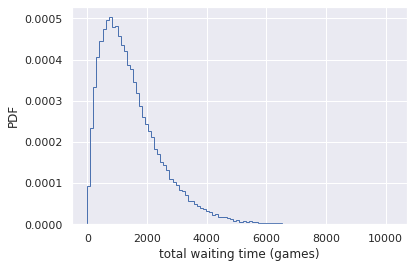

In [53]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_ = plt.hist(waiting_times,  normed = True, bins = 100, histtype = 'step')

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
_ = plt.show()

# Conclusão: Observe que o PDF está no auge, diferentemente do tempo de espera para
# um único processo de Poisson.

Por diversão (e iluminação) também traçar o CDF.

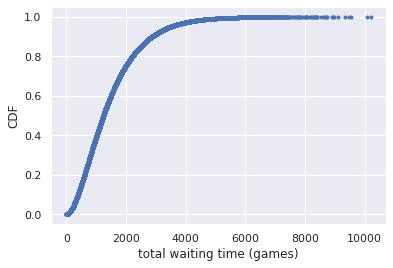

In [54]:
x = np.sort(waiting_times)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the CDFs and show the plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('CDF')
plt.show()